### III. Feature Analysis and Visualization Before Individual Modeling

1. Load, Clean & Preprocess Data: Load the dataset and clean it.
-   Apply the data_cleaning.py and data_preprocessing.py scripts to clean and preprocess the data. 

1. Split the Data
-   Prepare the data frames (test and train) using cleaned and preprocessed dataset

2. Feature Analysis:
-   Apply PCA (Principal Component Analysis) to reduce dimensionality while retaining most of the variance
-   Apply RFE (Recursive Feature Elimination) to select the most important features
-   Map Selected PCA Components to Original Features to understand the contributions of original features to the selected PCA components.

3. Feature Selection:
-   Select the top features using RFE
-   Select the top features based on Random Forest Regressor importance (RFG feature importance)

4. Modeling and Evaluation:
-   Compare the selected features
-   Train models using selected features
-   Perform hyperparameter tuning for Random Forest
-   Evaluate and select top 30 features from the better model (intersection)

Common Setup for All Models

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import data_cleaning as dc
import data_preprocessing as dp
import feature_engineering as fe

# Load and clean the data
file_path = 'data/AmesData.csv'
ames_df_cleaned = dc.load_and_clean_data(file_path)

# Preprocess the cleaned data
ames_df_preprocessed, saleprice_scaler = dp.preprocess_data(ames_df_cleaned)

# Prepare features and target variable
X = ames_df_preprocessed.drop(['SalePrice'], axis=1)
y = ames_df_preprocessed['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
X_train_pca, pca = fe.apply_pca(X_train, explained_variance=0.95)
X_test_pca = pca.transform(X_test)

# Apply RFE
X_train_rfe, rfe = fe.apply_rfe(X_train_pca, y_train, n_features=30)
X_test_rfe = rfe.transform(X_test_pca)



Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.
Categorical variables encoded.
Numerical features standardized.
'SalePrice' standardized.
Explained variance ratio: 0.9513195107448541
PCA Training Time: 5.26 seconds
Training Time for RFE: 212.45 seconds


In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import data_cleaning as dc
import data_preprocessing as dp
import feature_engineering as fe

# Load and clean the data
file_path = 'data/AmesData.csv'
ames_df_cleaned = dc.load_and_clean_data(file_path)

# Preprocess the cleaned data
ames_df_preprocessed, saleprice_scaler = dp.preprocess_data(ames_df_cleaned)

num_rows, num_columns = ames_df_preprocessed.shape
print(f"The dataset ames_df_preprocessed contains {num_rows} rows and {num_columns} columns.")

# Prepare features and target variable
X = ames_df_preprocessed.drop(['SalePrice'], axis=1)
y = ames_df_preprocessed['SalePrice']

# Verify the number of features after preprocessing and dropping the target variable
print(f"The dataset ames_df_preprocessed contains {X.shape[1]} features after preprocessing.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.
Categorical variables encoded.
Numerical features standardized.
'SalePrice' standardized.
The dataset ames_df_preprocessed contains 2764 rows and 256 columns.
The dataset ames_df_preprocessed contains 255 features after preprocessing.


## **Feature Analysis:**

**Apply PCA: Principle Component Analysis**

Explained variance ratio: 0.9513195107448541
PCA Training Time: 0.20 seconds


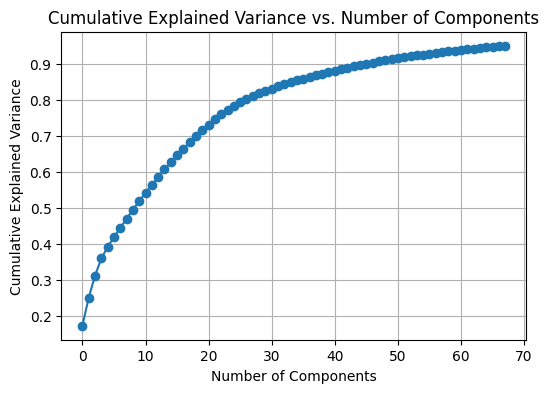

Number of components selected: 68


In [54]:
# Apply PCA
X_train_pca, pca = fe.apply_pca(X_train, explained_variance=0.95)
X_test_pca = pca.transform(X_test)

# Cumulative Explained Variance Plot
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Select the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected: {n_components}")

The PCA plot indicates that 68 components will explain approximately 95% of the variance in the dataset. Let's move forward with the selected number of components and proceed with the Random Forest Regressor and Recursive Feature Elimination (RFE) to visualize our Feature Selection process. 

**Map PCA Components Back to Original Features**

Understand the contributions of original features to the selected PCA components.

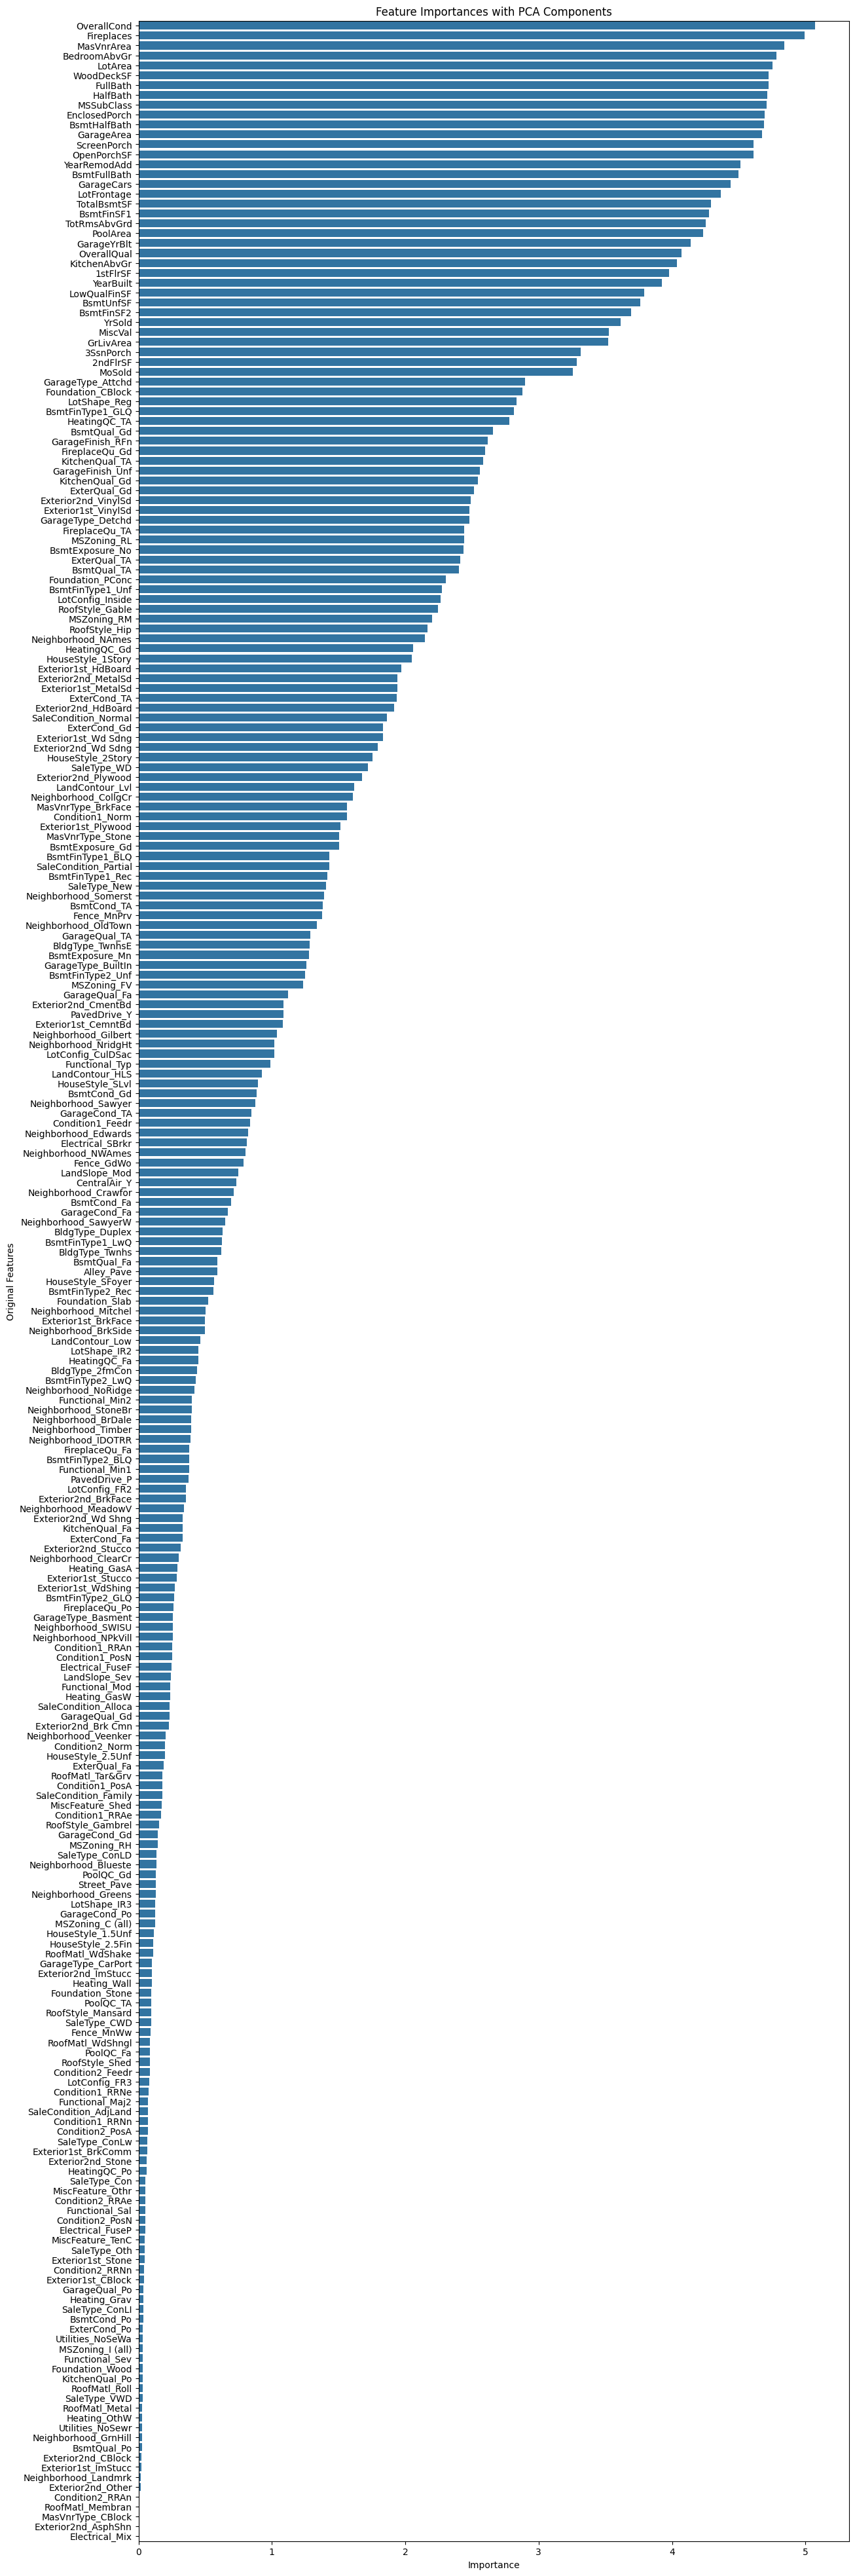

In [55]:
# Map PCA components back to original features
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=X.columns)

# Aggregate the contributions of original features
feature_contributions = loadings_df.abs().sum(axis=1).sort_values(ascending=False)

# Plot feature importances based on original features
plt.figure(figsize=(14, 50))
sns.barplot(x=feature_contributions.values, y=feature_contributions.index)
plt.title('Feature Importances with PCA Components')
plt.xlabel('Importance')
plt.ylabel('Original Features')
plt.show()

**Apply RFE: Recursive Feature Elimination**

In [56]:
# Apply RFE
X_train_rfe, rfe = fe.apply_rfe(X_train_pca, y_train, n_features=50)
X_test_rfe = rfe.transform(X_test_pca)

# Verify the shape of the transformed data
print(f"Shape of X_train after RFE: {X_train_rfe.shape}")
print(f"Shape of X_test after RFE: {X_test_rfe.shape}")

Training Time for RFE: 140.12 seconds
Shape of X_train after RFE: (2211, 50)
Shape of X_test after RFE: (553, 50)


Map Selected PCA Components Back to Original Features and Plot Top 50:

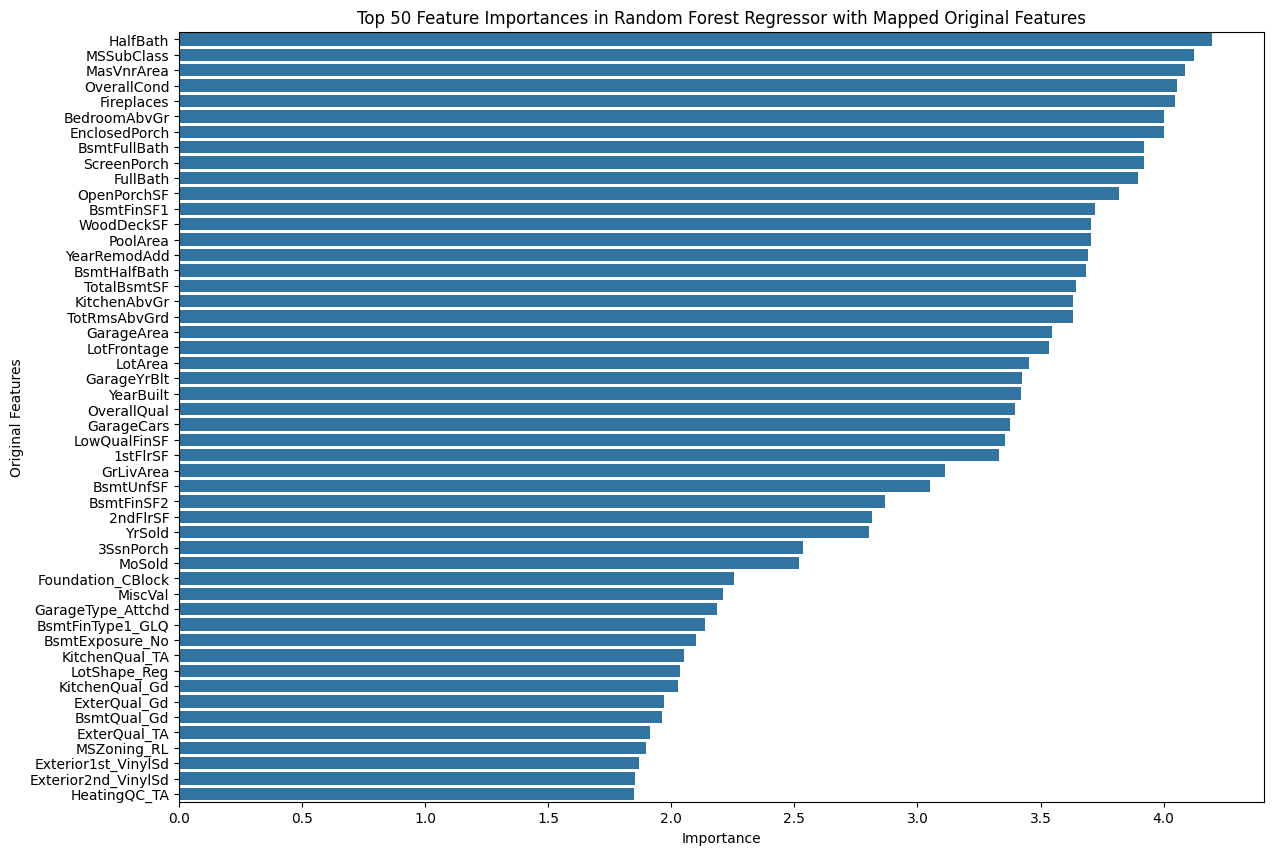

In [59]:
# Get the selected PCA components from RFE
selected_pca_indices = rfe.get_support(indices=True)
selected_components = loadings_df.iloc[:, selected_pca_indices]

# Aggregate the contributions of original features for the selected PCA components
selected_feature_contributions = selected_components.abs().sum(axis=1).sort_values(ascending=False)

# Select the top 50 features
top_50_features = selected_feature_contributions.head(50)

# Plot feature importances based on the top 50 original features
plt.figure(figsize=(14, 10))
sns.barplot(x=top_50_features.values, y=top_50_features.index)
plt.title('Top 50 Feature Importances in Random Forest Regressor with Mapped Original Features')
plt.xlabel('Importance')
plt.ylabel('Original Features')
plt.show()


This plot shows the top 50 features contributing the most to the final model after the combined effect of PCA and RFE.